In [72]:
%matplotlib inline
import pandas as pd
import pdb
import matplotlib.pyplot as plt
import datetime 
from matplotlib.pyplot import figure 
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

In [73]:
# libraries for doing statistical analysis 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm 

In [74]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("Health Data 2.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,Start,Finish,Active Calories (kcal),Blood Pressure (Diastolic) (mmHg),Blood Pressure (Systolic) (mmHg),Body Temperature (degC),Cycling Distance (mi),Distance (mi),Flights Climbed (count),Forced Vital Capacity (L),Heart Rate (count/min),Respiratory Rate (count/min),Resting Calories (kcal),Steps (count)
0,01-Jan-2014 00:00,01-Jan-2014 01:00,65.404167,0.0,0.0,0.0,0.0,0.299951,0.0,0.0,0.0,0.0,831.355438,590.833333
1,01-Jan-2014 01:00,01-Jan-2014 02:00,65.404167,0.0,0.0,0.0,0.0,0.299951,0.0,0.0,0.0,0.0,831.355438,590.833333
2,01-Jan-2014 02:00,01-Jan-2014 03:00,65.404167,0.0,0.0,0.0,0.0,0.299951,0.0,0.0,0.0,0.0,831.355438,590.833333
3,01-Jan-2014 03:00,01-Jan-2014 04:00,65.404167,0.0,0.0,0.0,0.0,0.299951,0.0,0.0,0.0,0.0,831.355438,590.833333
4,01-Jan-2014 04:00,01-Jan-2014 05:00,65.404167,0.0,0.0,0.0,0.0,0.299951,0.0,0.0,0.0,0.0,831.355438,590.833333


In [82]:
struc_data = pd.read_csv('Health Data 2.csv', index_col= 0, parse_dates=True)
struc_data['Year'] = struc_data.index.year
struc_data['Month'] = struc_data.index.month
struc_data['Weekday'] = struc_data.index.weekday_name
struc_data['hour'] = struc_data.index.hour

In [83]:
data.head(4)

,Start,Finish,Active Calories (kcal),Blood Pressure (Diastolic) (mmHg),Blood Pressure (Systolic) (mmHg),Body Temperature (degC),Cycling Distance (mi),Distance (mi),Flights Climbed (count),Forced Vital Capacity (L),Heart Rate (count/min),Respiratory Rate (count/min),Resting Calories (kcal),Steps (count),Year,Month,Weekday,hour
0,01-Jan-2014 00:00,01-Jan-2014 01:00,65.404167,0.0,0.0,0.0,0.0,0.299951,0.0,0.0,0.0,0.0,831.355438,590.833333,2014,1,Wednesday,0
1,01-Jan-2014 01:00,01-Jan-2014 02:00,65.404167,0.0,0.0,0.0,0.0,0.299951,0.0,0.0,0.0,0.0,831.355438,590.833333,2014,1,Wednesday,1
2,01-Jan-2014 02:00,01-Jan-2014 03:00,65.404167,0.0,0.0,0.0,0.0,0.299951,0.0,0.0,0.0,0.0,831.355438,590.833333,2014,1,Wednesday,2
3,01-Jan-2014 03:00,01-Jan-2014 04:00,65.404167,0.0,0.0,0.0,0.0,0.299951,0.0,0.0,0.0,0.0,831.355438,590.833333,2014,1,Wednesday,3


In [85]:
struc_data.keys()

Index(['Finish', 'Active Calories (kcal)', 'Blood Pressure (Diastolic) (mmHg)',
       'Blood Pressure (Systolic) (mmHg)', 'Body Temperature (degC)',
       'Cycling Distance (mi)', 'Distance (mi)', 'Flights Climbed (count)',
       'Forced Vital Capacity (L)', 'Heart Rate (count/min)',
       'Respiratory Rate (count/min)', 'Resting Calories (kcal)',
       'Steps (count)', 'Year', 'Month', 'Weekday', 'hour'],
      dtype='object')

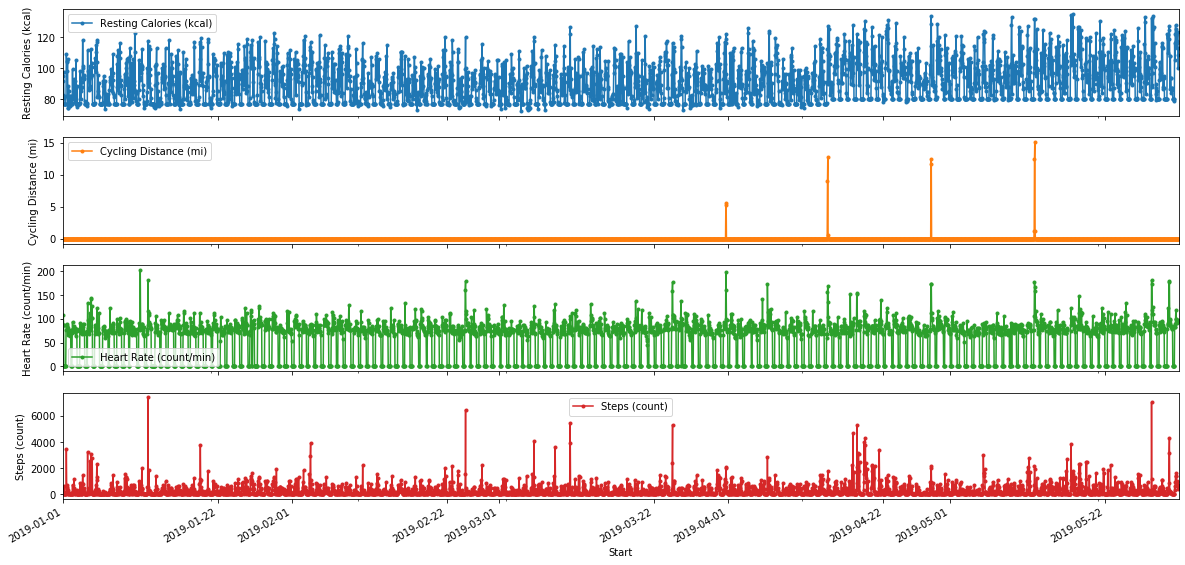

In [96]:
col_names = ['Resting Calories (kcal)', 'Cycling Distance (mi)', 'Heart Rate (count/min)','Steps (count)']
axes = struc_data[col_names].loc['2019-01':'2019-05'].plot(marker = '.', figsize=(20,10), linestyle = None, subplots = True)
ix = 0
for ax in axes:
    name = col_names[ix]
    ax.set_ylabel(name)
    ix +=1

In [84]:
v = data.keys()[2:]
L = len(data)

In [36]:
string = data['Start'][1]
date = datetime.datetime.strptime(string, "%d-%b-%Y %H:%M") 

# Remove the data points at which the Heart rate and steps are both zero (assume watch was not set)

In [37]:
myData = data[~((data['Heart Rate (count/min)' ] == 0) | (data['Steps (count)'] == 0))]

## Remove empty Columns 

In [38]:
processed_data = myData.drop(['Respiratory Rate (count/min)', 'Forced Vital Capacity (L)', 'Body Temperature (degC)','Blood Pressure (Diastolic) (mmHg)','Blood Pressure (Systolic) (mmHg)'], axis = 1)
# myData = data.drop(['Start', 'Finish', 'Forced Vital Capacity (L)', 'Respiratory Rate (count/min)'] ,axis = 1)

In [39]:
#myData = data[data['Steps (count)'] != 0]
processed_data.head()

,Start,Finish,Active Calories (kcal),Cycling Distance (mi),Distance (mi),Flights Climbed (count),Heart Rate (count/min),Resting Calories (kcal),Steps (count)
296,13-Jan-2014 08:00,13-Jan-2014 09:00,211.245829,0.0,0.785543,0.0,65.0,793.985392,1509.166667
785,02-Feb-2014 17:00,02-Feb-2014 18:00,540.712484,0.0,3.908210,0.0,68.0,837.860413,5818.750000
1099,15-Feb-2014 19:00,15-Feb-2014 20:00,178.274994,0.0,1.807385,0.0,71.0,823.704580,3465.000000
1210,20-Feb-2014 10:00,20-Feb-2014 11:00,106.716665,0.0,1.059052,0.0,60.0,871.692912,2150.833333
1790,16-Mar-2014 14:00,16-Mar-2014 15:00,490.433350,0.0,3.654139,0.0,68.0,831.015015,5372.500000


In [40]:
processed_data.describe()

,Active Calories (kcal),Cycling Distance (mi),Distance (mi),Flights Climbed (count),Heart Rate (count/min),Resting Calories (kcal),Steps (count)
count,21967.000000,21967.000000,21967.000000,21967.000000,21967.000000,21967.000000,21967.000000
mean,35.276109,0.016631,0.228796,0.599683,84.891394,94.777909,465.502974
std,48.865828,0.416340,0.363697,1.587167,15.425027,24.770572,671.938971
min,0.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.064633
25%,15.975998,0.000000,0.053445,0.000000,75.000000,88.161299,116.000000
50%,25.194886,0.000000,0.130376,0.000000,82.000000,94.623842,273.223801
75%,40.281831,0.000000,0.275317,1.000000,91.000000,102.604681,562.109650
max,957.622360,16.540462,6.182141,60.495098,215.000000,871.780701,9550.000000


13
13


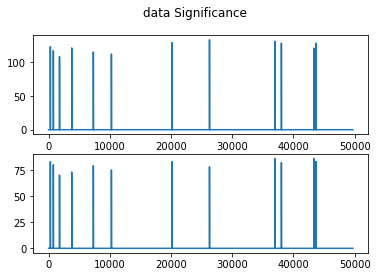

In [41]:
fig, ax = plt.subplots(2)
fig.suptitle('data Significance')
ax[0].plot(data['Blood Pressure (Systolic) (mmHg)'])
ax[1].plot(data['Blood Pressure (Diastolic) (mmHg)'])

x = data['Blood Pressure (Diastolic) (mmHg)']
bpd =  x[x !=0]
x = data['Blood Pressure (Systolic) (mmHg)']
bps = x[x !=0]
print(len(bpd))
print(len(bps))

## add the hour, Month, year  seperately 

In [42]:
hours = processed_data['Start'].map(lambda s: pd.to_datetime(s).hour)
months = processed_data['Start'].map(lambda s: pd.to_datetime(s).month)
years = processed_data['Start'].map(lambda s: pd.to_datetime(s).year)

In [43]:
processed_data = processed_data.assign(hour=hours.values, month = months.values, year = years.values)

In [44]:
processed_data.head()

,Start,Finish,Active Calories (kcal),Cycling Distance (mi),Distance (mi),Flights Climbed (count),Heart Rate (count/min),Resting Calories (kcal),Steps (count),hour,month,year
296,13-Jan-2014 08:00,13-Jan-2014 09:00,211.245829,0.0,0.785543,0.0,65.0,793.985392,1509.166667,8,1,2014
785,02-Feb-2014 17:00,02-Feb-2014 18:00,540.712484,0.0,3.908210,0.0,68.0,837.860413,5818.750000,17,2,2014
1099,15-Feb-2014 19:00,15-Feb-2014 20:00,178.274994,0.0,1.807385,0.0,71.0,823.704580,3465.000000,19,2,2014
1210,20-Feb-2014 10:00,20-Feb-2014 11:00,106.716665,0.0,1.059052,0.0,60.0,871.692912,2150.833333,10,2,2014
1790,16-Mar-2014 14:00,16-Mar-2014 15:00,490.433350,0.0,3.654139,0.0,68.0,831.015015,5372.500000,14,3,2014


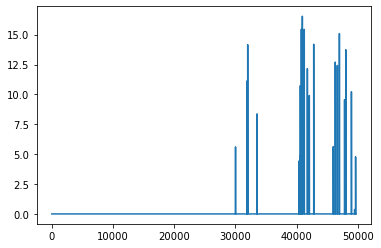

In [45]:
plt.plot(data['Cycling Distance (mi)'])

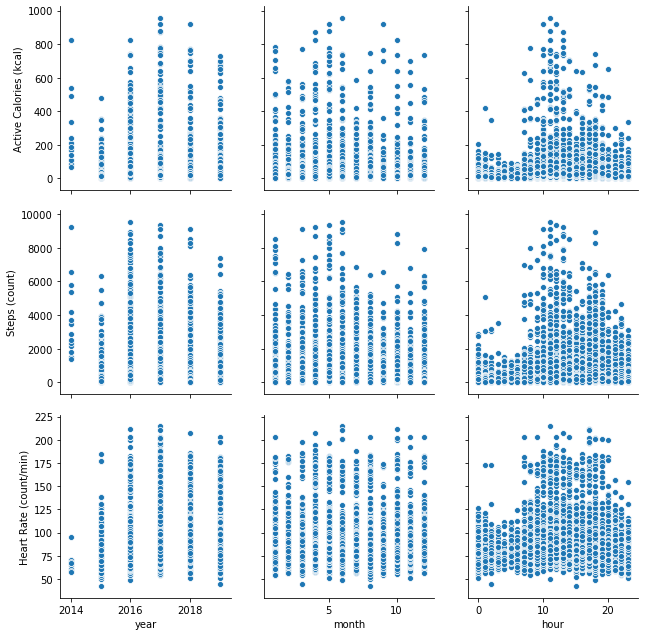

In [70]:
sns.pairplot(processed_data, x_vars = ['year', 'month', 'hour'],
                             y_vars = ['Active Calories (kcal)', 'Steps (count)', 'Heart Rate (count/min)'], height=3);

In [71]:
# check the heart rate at different hours or months for each year

In [16]:
processed_data[processed_data['year'] == 2014]

In [ ]:


L = len(data['Steps (count)'])
hr = data['Heart Rate (count/min)']
cd = data['Cycling Distance (mi)']
resp = data['Respiratory Rate (count/min)']
activeCal = data['Active Calories (kcal)']
bd_temp = data['Body Temperature (degC)']
dist = data['Distance (mi)']
flights = data['Flights Climbed (count)']
steps = data['Steps (count)']
restCal = data['Resting Calories (kcal)']

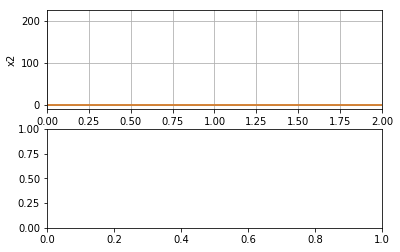

In [24]:
t = np.arange(0,L)
fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].grid(True)

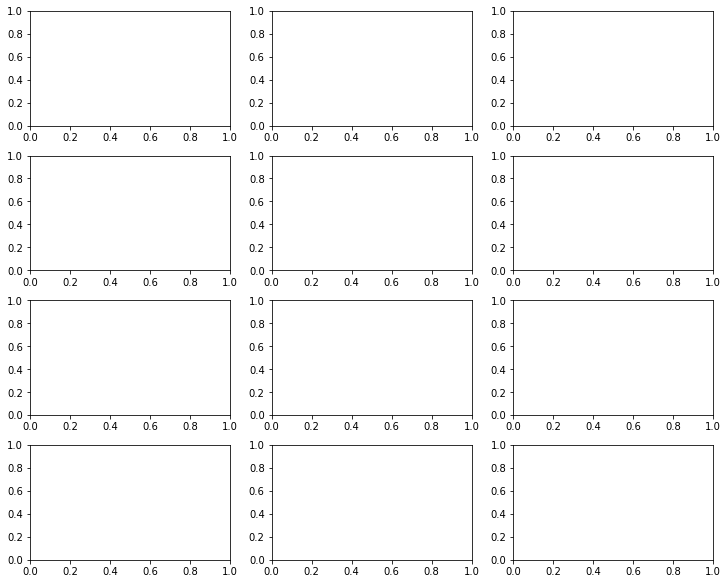

In [78]:
resp = pd.Series(hr)
figsize = (10, 8)
fig, axs = plt.subplots( 4, 3, figsize = figsize, constrained_layout=True)

In [ ]:
for ax in axs:
    name = v[ax]
    ax.set_title('data')
    dt = data[v[ax]]
    ax.plot(dt 'o', ls='-', ms=4, markevery=case)


#sns.distplot(resp, fig);
#resp.plot(figsize=(40,10))

NameError: name 'df' is not defined

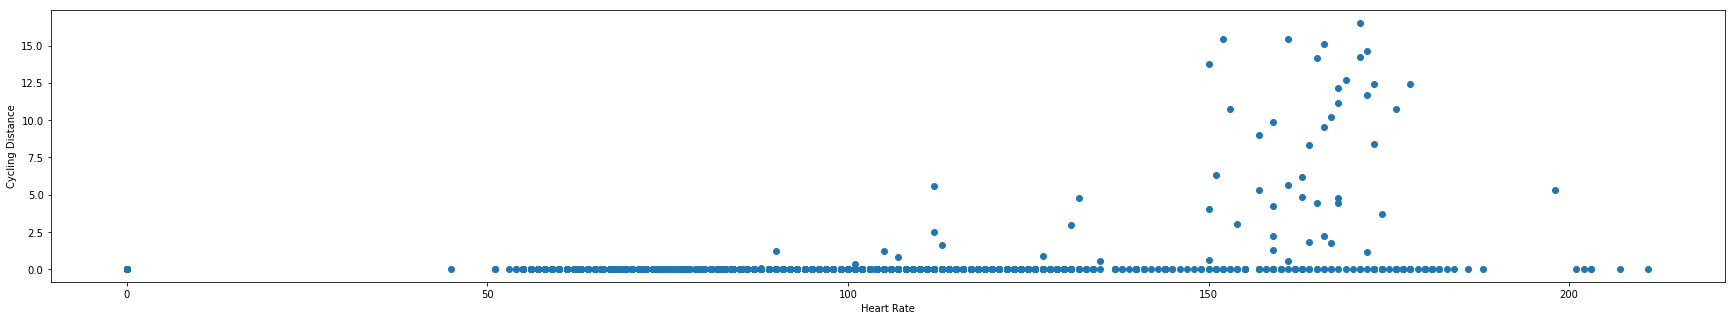

In [48]:
plt.figure(figsize=(30,5))
plt.scatter(s1[ind2:], s2[ind2:])
plt.xlabel('Heart Rate')
plt.ylabel('Cycling Distance')
plt.show()

In [47]:
ind1 = np.argwhere(s1 > 0)[0][0]
ind2 = np.argwhere(s2 >0)[0][0]
ind2

30013

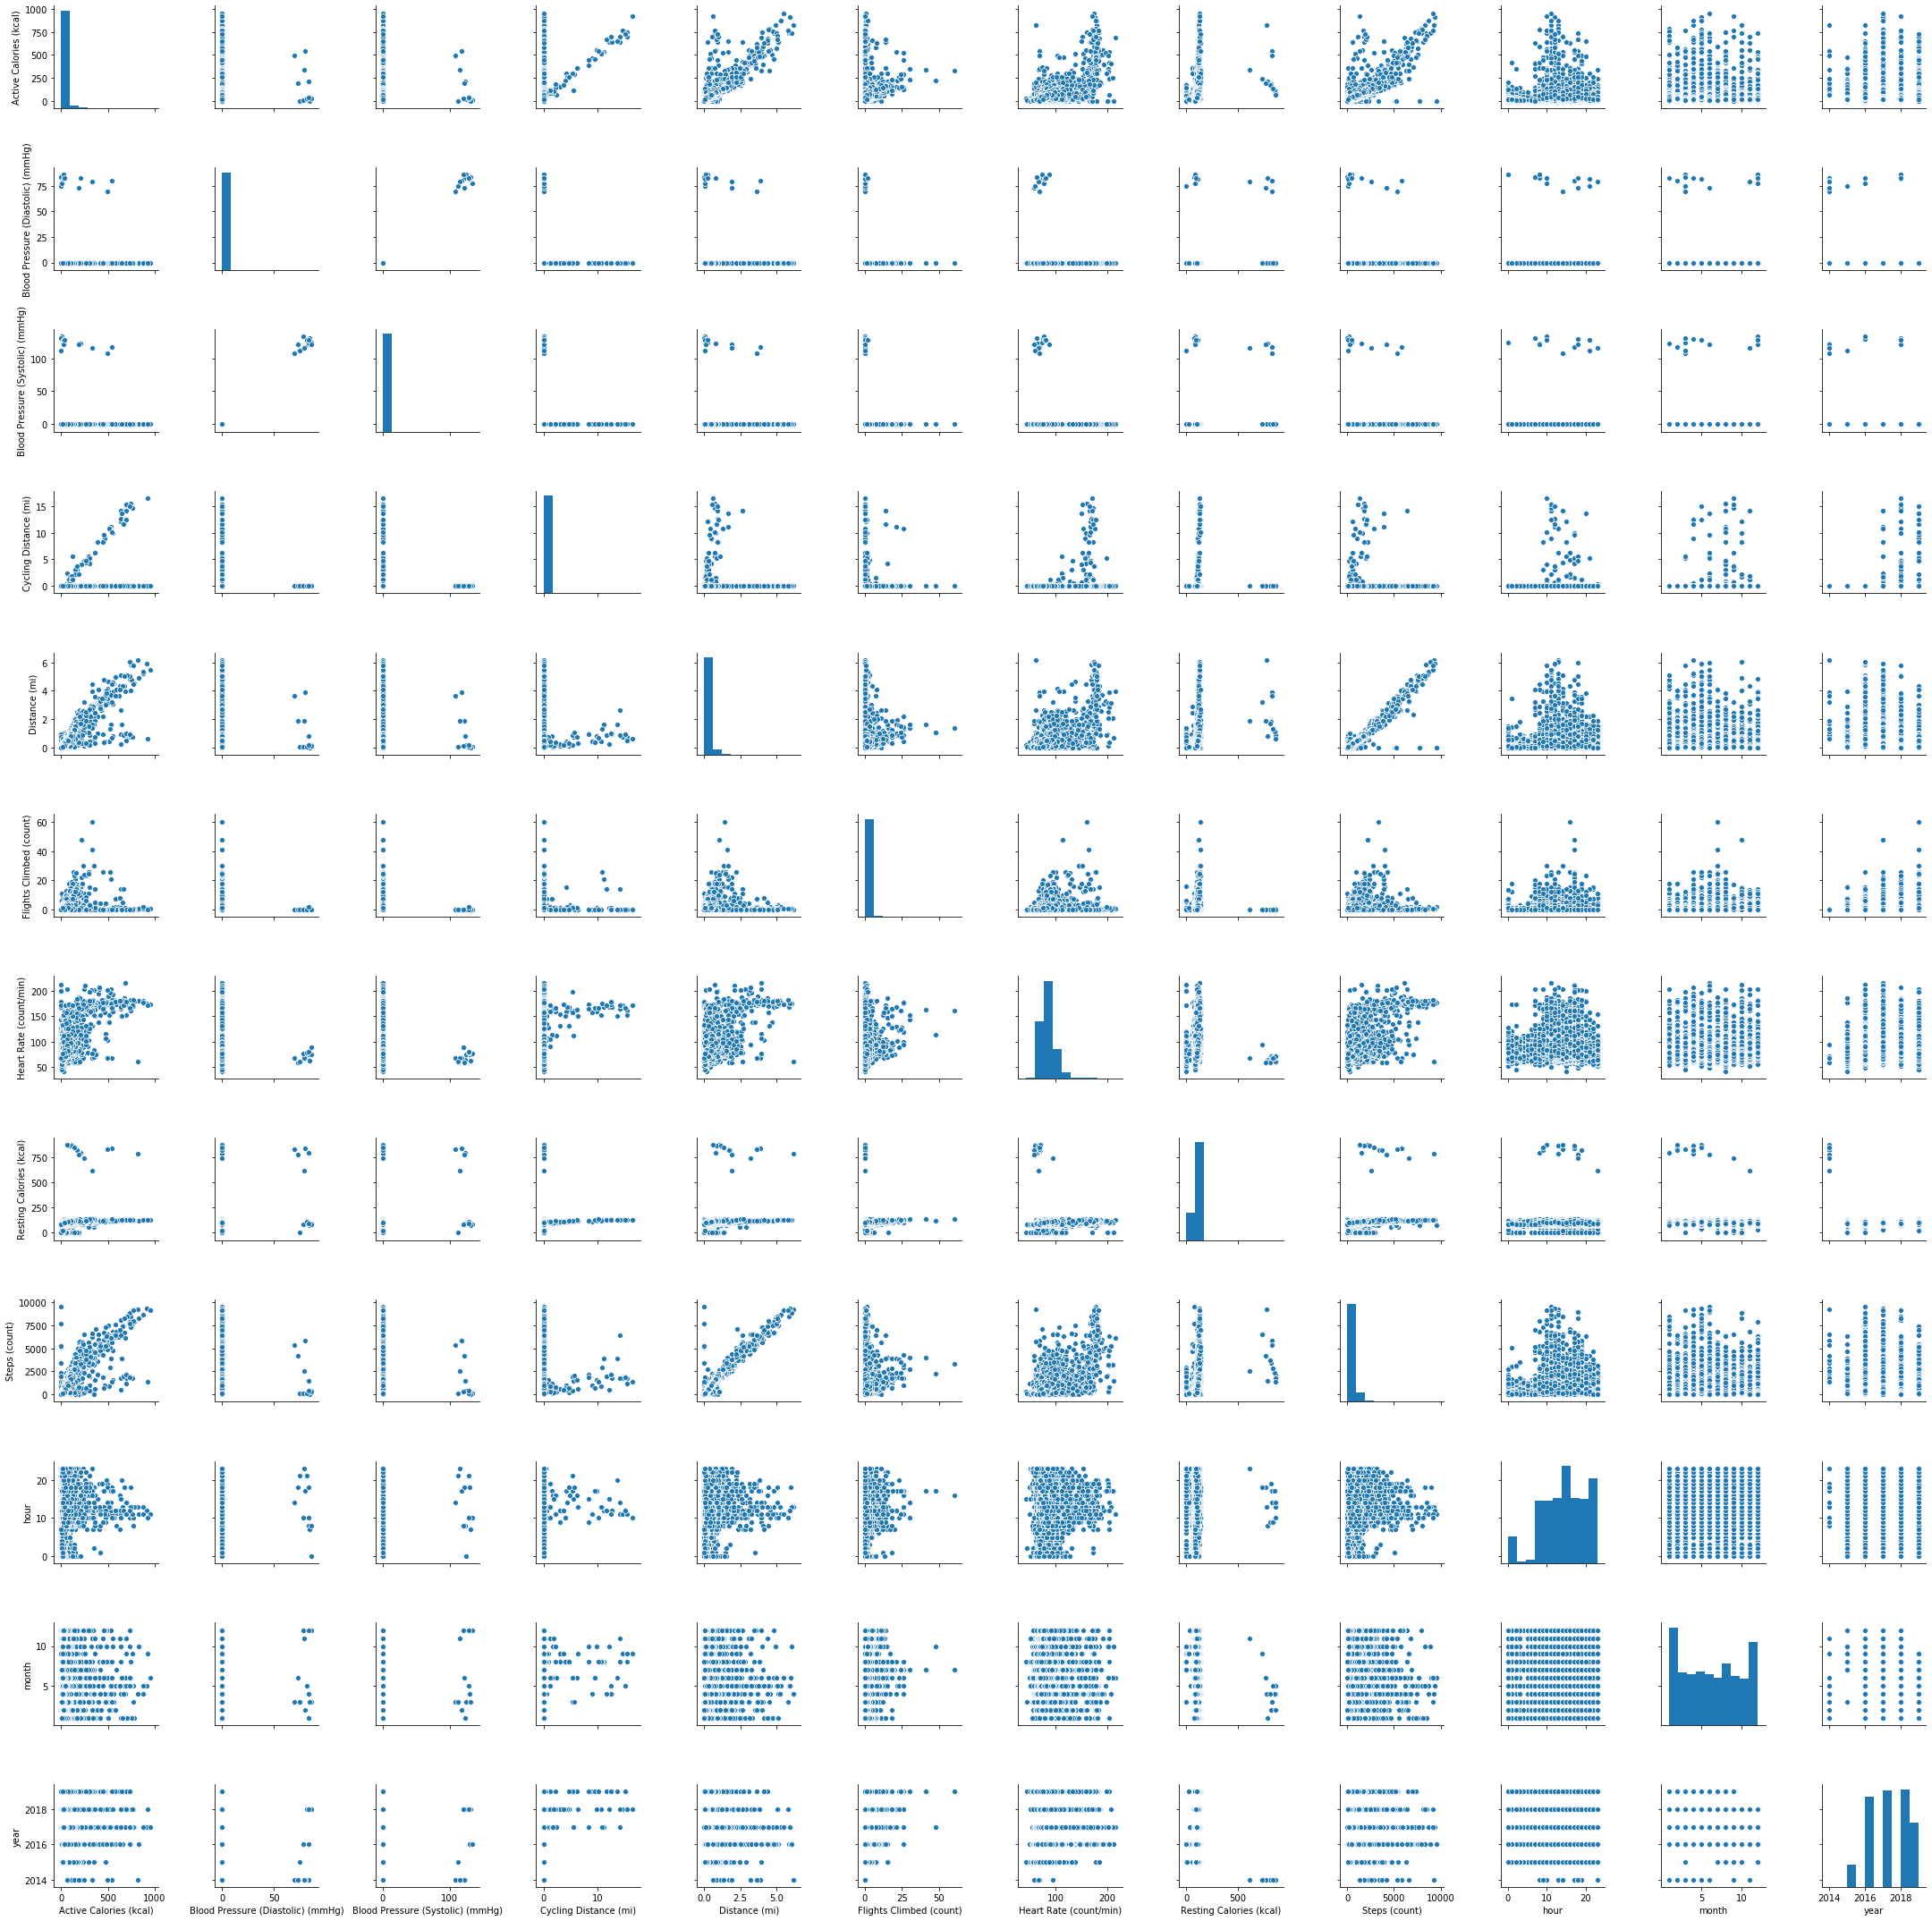

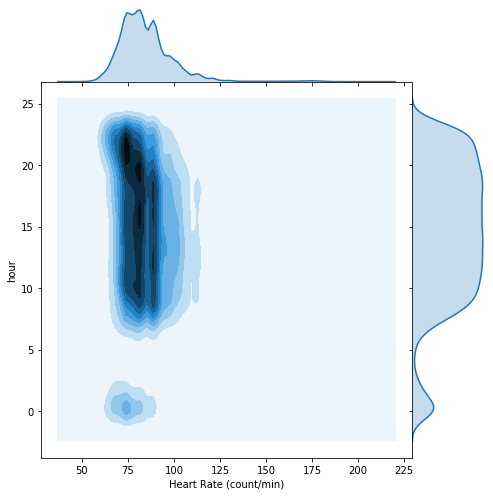

In [78]:
x1 = processed_data['Heart Rate (count/min)']
x2 = processed_data['hour']
g = sns.jointplot(x1, x2, kind="kde", height=7, space=0)

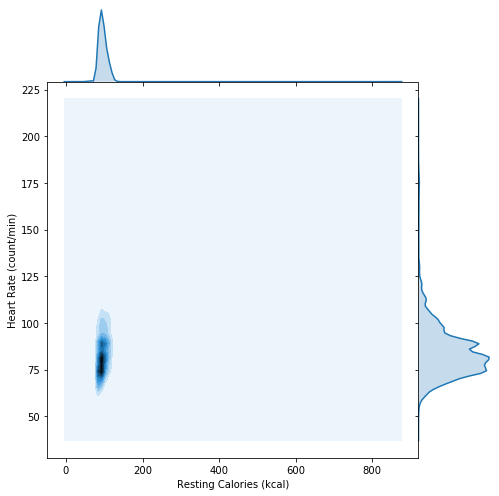

In [81]:
x1 = processed_data['Resting Calories (kcal)']
x2 = processed_data['Heart Rate (count/min)']
g2 = sns.jointplot(x1, x2, kind="kde", height = 7, space=0)

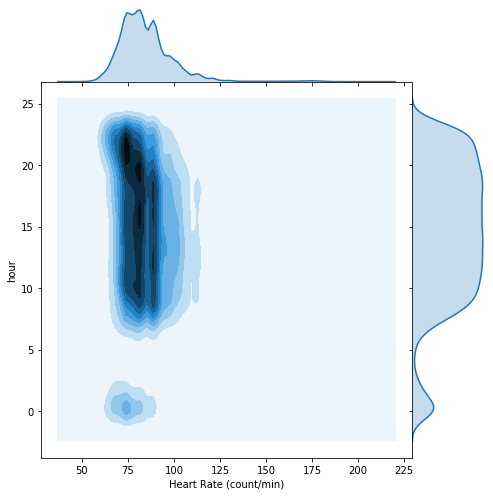

In [88]:
x1 = processed_data['hour']
x2 = processed_data['Heart Rate (count/min)']
g2 = sns.jointplot(x2, x1, kind="kde", height = 7, space=0)

In [79]:
processed_data.keys()

Index(['Start', 'Finish', 'Active Calories (kcal)',
       'Blood Pressure (Diastolic) (mmHg)', 'Blood Pressure (Systolic) (mmHg)',
       'Cycling Distance (mi)', 'Distance (mi)', 'Flights Climbed (count)',
       'Heart Rate (count/min)', 'Resting Calories (kcal)', 'Steps (count)',
       'hour'],
      dtype='object')